<a href="https://colab.research.google.com/github/Anth-us/Benfords-Law-article/blob/main/Benfords_Law_Financial_Analysis_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benford's Law Financial Analysis Simulation

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib as mpl

# Plot configuration

mpl.rcParams['text.color'] = '#333'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['figure.figsize'] = (16, 9)

primary_color = (0.815, 0.2, 0.51)  # Fuchsia
secondary_color = (0.012, 0.635, 0.996)  # Blue

## Simulation Configuration

Adjust these parameters to change the number of days, number of transactions, and the percentage of simulated structured transactions in the scenario where someone is making structured deposits.

In [ ]:
# Simulation configuration

# Number of days in the simulation
number_of_days = 365

# Number of transactions per day
transactions_per_day = 1000

# How many of the simulated transactiona are structured?
proportion_of_structured_transactions = 0.01

## Simulation of Natural Data

In this part, we simulate a set of 'natural' transaction data, spanning a range from $1 to $9999. This dataset is intended to represent a typical, unmanipulated set of financial transactions. We then calculate the distribution of the first digits of these transaction amounts and plot this distribution against the expected distribution according to Benford's Law. This serves as a baseline for comparison with datasets that might be manipulated or 'structured'.

### Aggregation: Daily totals

The aggregation process in the simulation of transaction data plays a crucial role in bringing out the characteristics of Benford's Law. Here's an explanation of what this aggregation entails and why it causes the transaction data to reflect Benford's Law:

In the simulation, we are aggregating transaction data over time—specifically, summing up transaction amounts for each day. This means that for each day in our simulated period, we calculate the total amount of money transacted on that day. This type of aggregation is common in financial analyses where daily, monthly, or annual summaries are needed.

#### Why Does Aggregation Cause Data to Reflect Benford's Law?

Benford's Law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. For instance, the number '1' appears as the first digit about 30% of the time, much more frequently than larger digits.

* ***Spanning Multiple Orders of Magnitude:*** When individual transaction amounts, which can vary widely, are aggregated, the resulting sums span multiple orders of magnitude. Benford's Law is most effective when the data covers a broad range of magnitudes.
* ***Combination of Values:*** Aggregation combines values in a way that the distribution of their first digits becomes non-uniform and logarithmic, as predicted by Benford's Law. This happens because aggregated totals are more likely to start with smaller digits, given the nature of logarithmic scaling.
* ***Diverse Transaction Sizes:*** In a set of transactions, especially in a financial context, there are often many small transactions and fewer large transactions. When these are summed up, the totals tend to start more frequently with smaller digits, aligning with the predictions of Benford's Law.
* ***Non-linear Growth:*** Financial data often grows non-linearly, meaning it doesn't increase by the same amount each period. This non-linear growth in aggregated data is another reason why such data tends to follow Benford's Law.

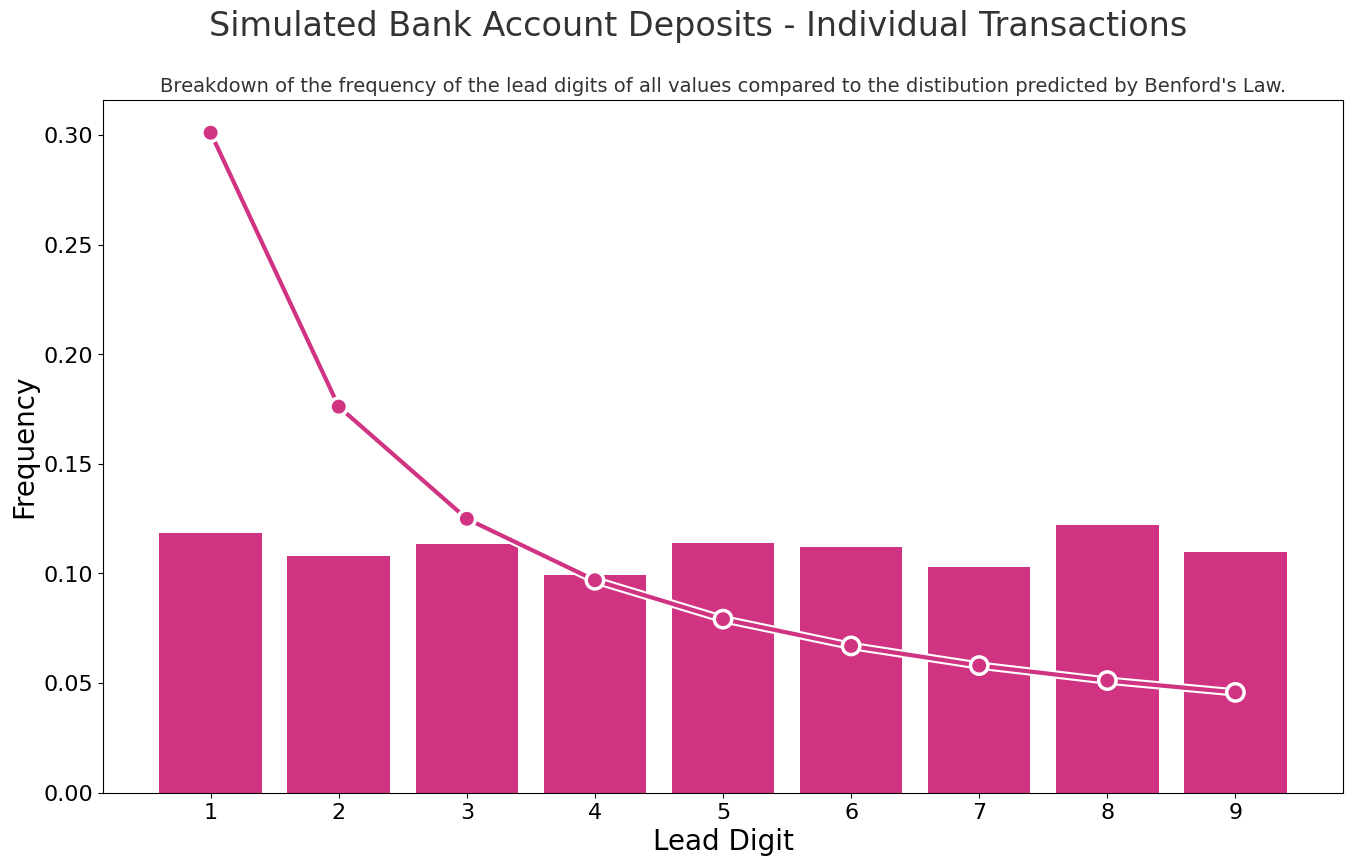

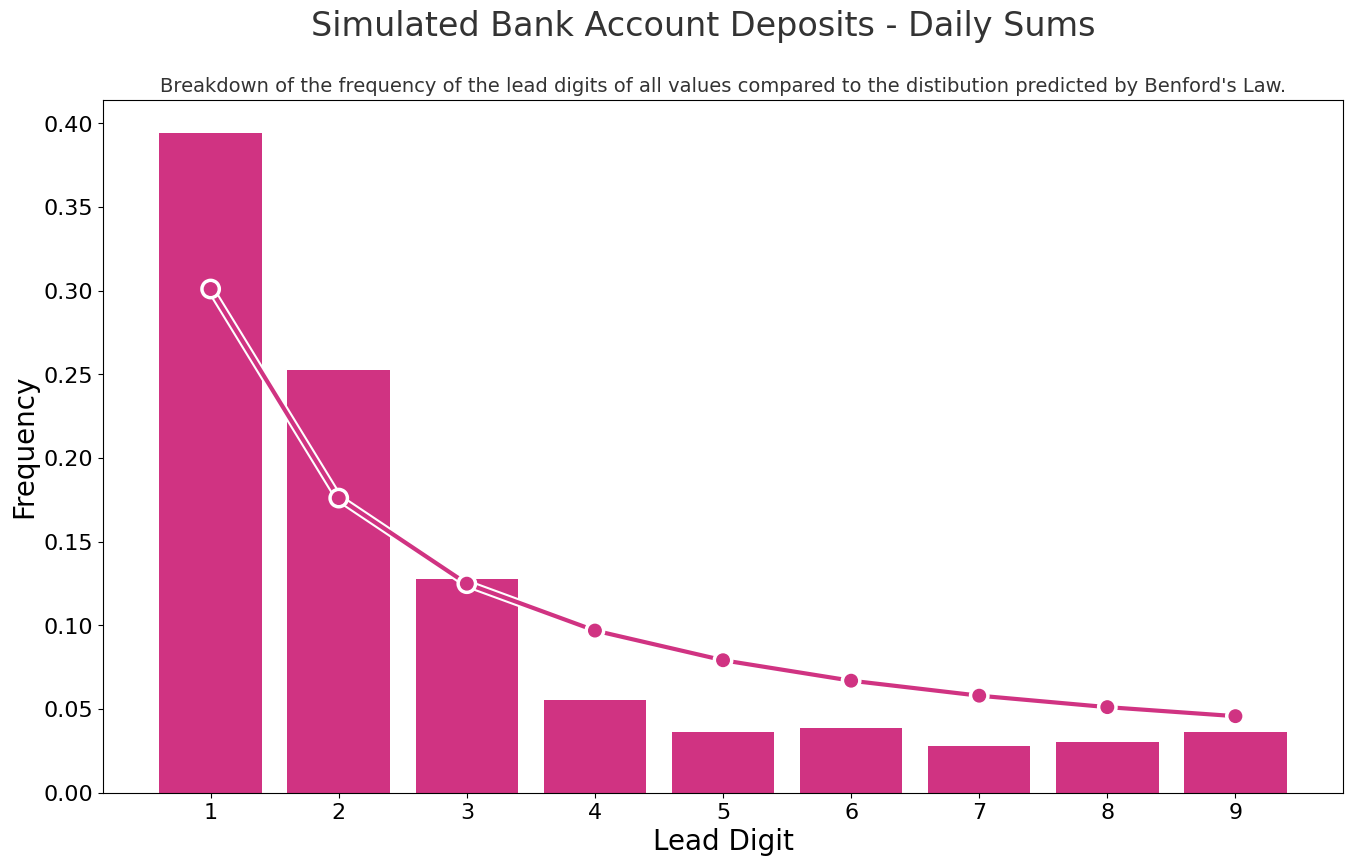

In [ ]:
start_date = '2020-01-01'
end_date = pd.to_datetime(start_date) + pd.Timedelta(days=number_of_days - 1)
total_transactions = number_of_days * transactions_per_day  # Total number of transactions

# Benford's Law distribution
def benfords_law_digit_distribution():
    return {digit: np.log10(1 + 1/digit) for digit in range(1, 10)}

# Function to calculate the first digit distribution
def calculate_first_digit_distribution(data):
    first_digits = [int(str(amount)[0]) for amount in data]
    digit_counts = pd.Series(first_digits).value_counts(normalize=True).sort_index()
    return digit_counts

# Define the plot_histogram function
def plot_histogram(data, title, subtitle='', color=primary_color):
    benfords_dist = benfords_law_digit_distribution()
    distribution = calculate_first_digit_distribution(data)

    plt.bar(distribution.index, distribution.values, color=color)
    plt.plot(list(benfords_dist.keys()), list(benfords_dist.values()), color=primary_color, linewidth=3, linestyle='-',
             path_effects=[path_effects.withStroke(linewidth=6, foreground='white')])
    plt.scatter(list(benfords_dist.keys()), list(benfords_dist.values()), color=primary_color, s=9**2, zorder=3,
                path_effects=[path_effects.withStroke(linewidth=6, foreground='white')])
    plt.suptitle(title, fontsize=24)
    plt.title(subtitle, fontsize=14)
    plt.xticks(range(1, 10))
    plt.xlabel('Lead Digit', fontsize=20)
    plt.ylabel('Frequency')
    plt.savefig(title.lower().replace(' ', '-') + '.png')
    plt.show()

def simulate_transactions(n_total, structured_proportion, start_date, end_date):
    n_structured = int(n_total * structured_proportion)
    n_normal = n_total - n_structured

    dates = pd.date_range(start=start_date, end=end_date)

    # Simulate normal transactions
    normal_transactions = np.random.uniform(1, 9999, n_normal)
    normal_dates = np.random.choice(dates, n_normal)

    data = pd.DataFrame({'Date': normal_dates, 'Amount': normal_transactions})
    return data.sample(frac=1).reset_index(drop=True)

# Simulate and aggregate structured transactions
natural_transactions = simulate_transactions(1500, 0.1, '2020-01-01', '2020-12-31')
natural_transactions['Date'] = pd.to_datetime(natural_transactions['Date'])
aggregated_natural_transactions = natural_transactions.groupby(natural_transactions['Date'].dt.date)['Amount'].sum()

# Plotting histograms for structured transactions
plot_histogram(natural_transactions['Amount'], 'Simulated Bank Account Deposits - Individual Transactions ', "Breakdown of the frequency of the lead digits of all values compared to the distibution predicted by Benford's Law.")
plot_histogram(aggregated_natural_transactions, 'Simulated Bank Account Deposits - Daily Sums', "Breakdown of the frequency of the lead digits of all values compared to the distibution predicted by Benford's Law.")


##  Simulation of Data with Structured Transactions

In this part, we simulate another dataset, but this time with structured transactions. We mimic the technique often used in financial fraud, such as splitting large transactions into multiple smaller ones to avoid detection. These transactions are deliberately kept just below a typical threshold (e.g., $9999). This structured behavior can impact the distribution of first digits.

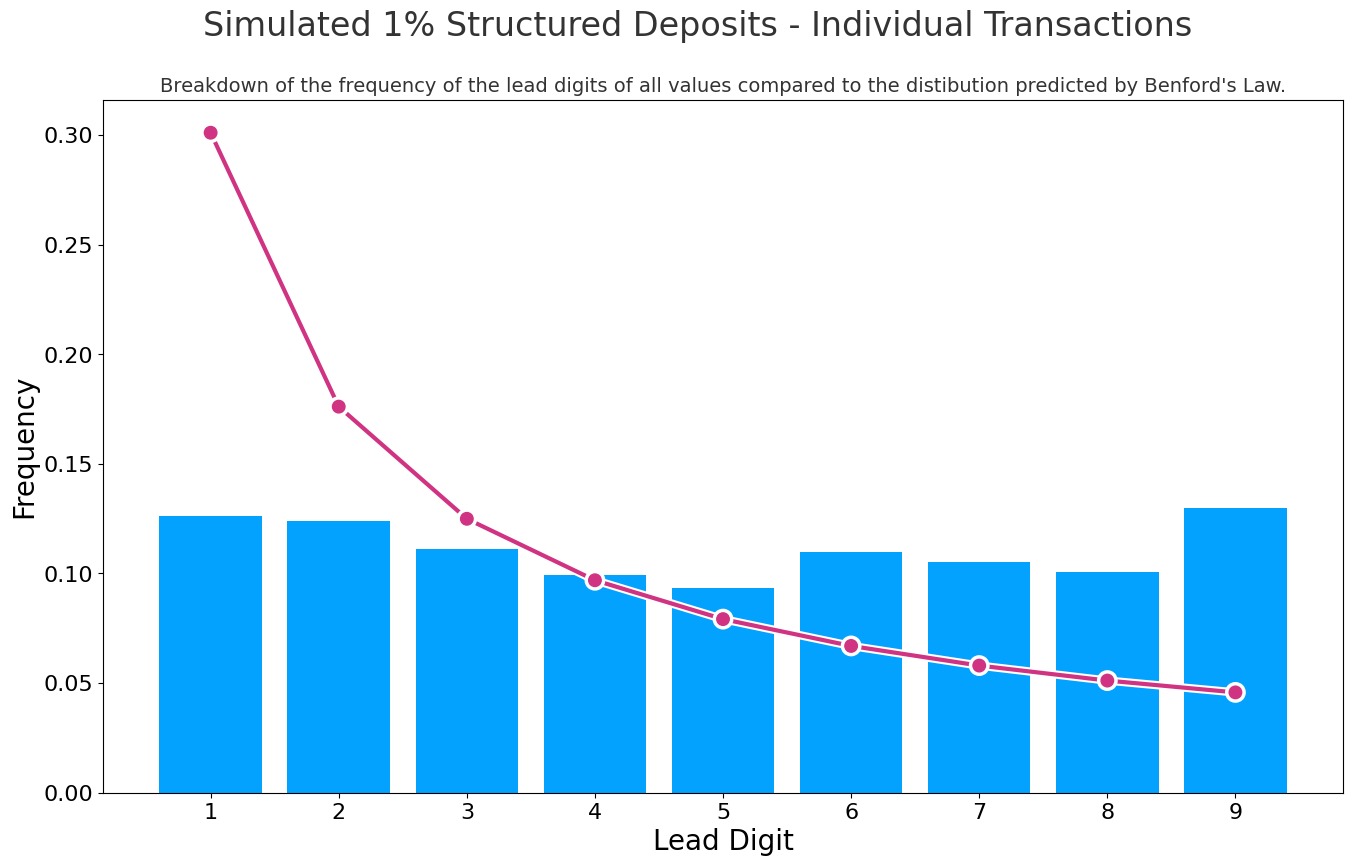

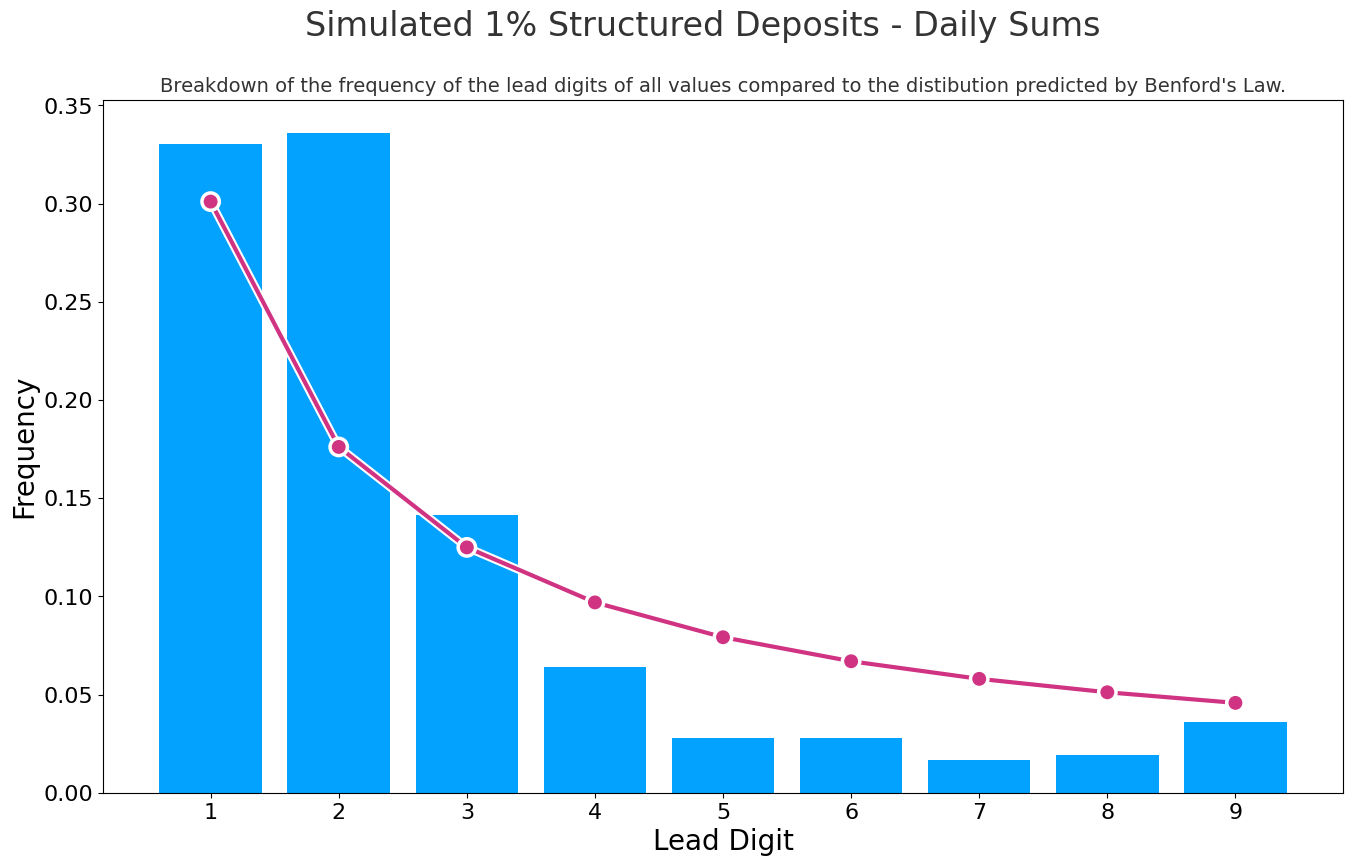

In [ ]:
# Function to simulate transactions with structured transactions
def simulate_transactions_with_structured(n_total, structured_proportion, start_date, end_date):
    n_structured = int(n_total * structured_proportion)
    n_normal = n_total - n_structured

    dates = pd.date_range(start=start_date, end=end_date)

    # Simulate normal transactions
    normal_transactions = np.random.uniform(1, 9999, n_normal)
    normal_dates = np.random.choice(dates, n_normal)

    # Simulate structured transactions just below $9999
    structured_transactions = np.random.uniform(9500, 9999, n_structured)
    structured_dates = np.random.choice(dates, n_structured)

    # Combine and shuffle transactions
    all_transactions = np.concatenate([normal_transactions, structured_transactions])
    all_dates = np.concatenate([normal_dates, structured_dates])

    data = pd.DataFrame({'Date': all_dates, 'Amount': all_transactions})
    return data.sample(frac=1).reset_index(drop=True)

# Simulate and aggregate structured transactions
structured_transactions = simulate_transactions_with_structured(1500, proportion_of_structured_transactions, '2020-01-01', '2020-12-31')
structured_transactions['Date'] = pd.to_datetime(structured_transactions['Date'])
aggregated_structured_transactions = structured_transactions.groupby(structured_transactions['Date'].dt.date)['Amount'].sum()

# Plotting histograms for structured transactions
percent_of_structured = str(proportion_of_structured_transactions * 100).rstrip('0').rstrip('.') + '%'
plot_histogram(structured_transactions['Amount'], 'Simulated ' + percent_of_structured + ' Structured Deposits - Individual Transactions ', "Breakdown of the frequency of the lead digits of all values compared to the distibution predicted by Benford's Law.", color=secondary_color)
plot_histogram(aggregated_structured_transactions, 'Simulated ' + percent_of_structured + ' Structured Deposits - Daily Sums', "Breakdown of the frequency of the lead digits of all values compared to the distibution predicted by Benford's Law.", color=secondary_color)


## Statistical Measures for Comparing Distributions

After creating both sets of simulated daily transactions sums we explore three statistical measures for comparing distributions: the Chi-Square Test, the Kolmogorov-Smirnov Test, and the Kullback-Leibler Divergence. These metrics are used for quantitatively assessing how closely a given dataset follows an expected distribution - in our case, Benford's Law. Each metric offers a unique approach to measuring discrepancies between observed and expected distributions, providing valuable insights into the characteristics of the data.

### Hypothesis: The metrics should be higher for datasets containing structured transactions

Structured transactions, especially those designed to avoid detection or reporting thresholds (like staying just below $9999), can distort the natural logarithmic distribution of leading digits that we would expect to see if Benford's Law applies.  And so, we would expect each of these three metrics to be higher for a dataset with structured transactions buried in it.

* **Chi-Square Statistic:** Structured transactions often have an artificial cutoff, which means certain numbers are overrepresented or underrepresented. This leads to larger discrepancies between the observed and expected frequencies in certain digit positions, thus increasing the Chi-Square statistic.
* **Kolmogorov-Smirnov (KS) Statistic:** The KS statistic will be larger for the structured dataset because the cumulative distribution of first digits will likely deviate more from the cumulative distribution expected by Benford's Law. This is due to the unnatural clustering of first digits caused by structured transactions.
* **Kullback-Leibler (KL) Divergence:** Since KL Divergence measures the relative entropy between two distributions, the structured transactions will create an observed distribution that has a different "information content" compared to the expected distribution under Benford's Law, resulting in a higher KL Divergence.

In practical applications, such as forensic accounting or fraud detection, these statistical measures can help identify when a set of financial data doesn't conform to expected patterns and might warrant further investigation. If you consistently find higher values for these statistics in the structured dataset across different simulations, it reinforces the idea that the structured transactions are distorting the dataset away from the expected Benford's Law distribution.

In [ ]:
# The predicted Benford's Law distribution
benfords_dist = benfords_law_digit_distribution()

# Assuming 'natural_transactions' and 'structured_transactions' are already simulated and aggregated
natural_distribution = calculate_first_digit_distribution(aggregated_natural_transactions)
structured_distribution = calculate_first_digit_distribution(aggregated_structured_transactions)

### Chi-Square Statistic

The Chi-Square statistic is a measure used to determine how well an observed distribution of data fits an expected distribution. It's particularly useful for categorical data and is frequently employed in hypothesis testing. In our case, we use it to compare the distribution of the first digits of our transaction data against the expected Benford's Law distribution.

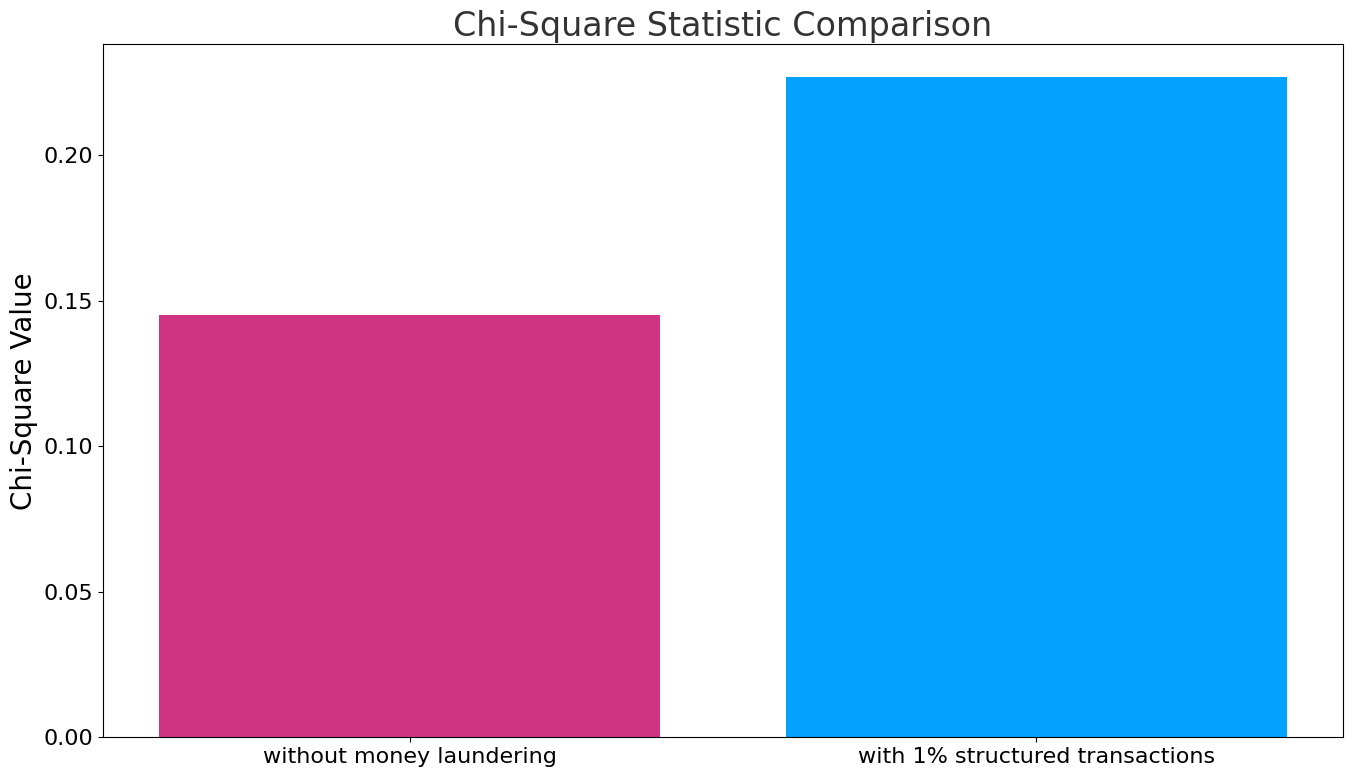

In [ ]:
from scipy.stats import chisquare

# Compute the Chi-Square statistic
def calculate_chi_square(observed_distribution, expected_distribution):
    observed_frequencies = observed_distribution * observed_distribution.sum()
    expected_frequencies = pd.Series(expected_distribution) * observed_frequencies.sum()
    chi_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
    return chi_stat, p_value

# Calculate first digit distribution for both datasets
natural_distribution = calculate_first_digit_distribution(aggregated_natural_transactions)
structured_distribution = calculate_first_digit_distribution(aggregated_structured_transactions)

# Benford's distribution for comparison
benfords_dist = list(benfords_law_digit_distribution().values())

# Calculate Chi-Square statistics
chi_stat_natural, _ = calculate_chi_square(natural_distribution, benfords_dist)
chi_stat_structured, _ = calculate_chi_square(structured_distribution, benfords_dist)

# Plot Chi-Square results
plt.bar(['without money laundering', 'with 1% structured transactions'], [chi_stat_natural, chi_stat_structured], color=[primary_color, secondary_color])
title='Chi-Square Statistic Comparison'
plt.title(title)
plt.ylabel('Chi-Square Value')
plt.savefig(title.lower().replace(' ', '-') + '.png')
plt.show()

### Kolmogorov-Smirnov (KS) Statistic

The Kolmogorov-Smirnov (KS) statistic is a non-parametric test that measures the maximum distance between the cumulative distribution functions of two datasets. Unlike the Chi-Square test, the KS test can be used for both continuous and categorical variables. We apply this test to compare our observed transaction data with the expected Benford's Law distribution.

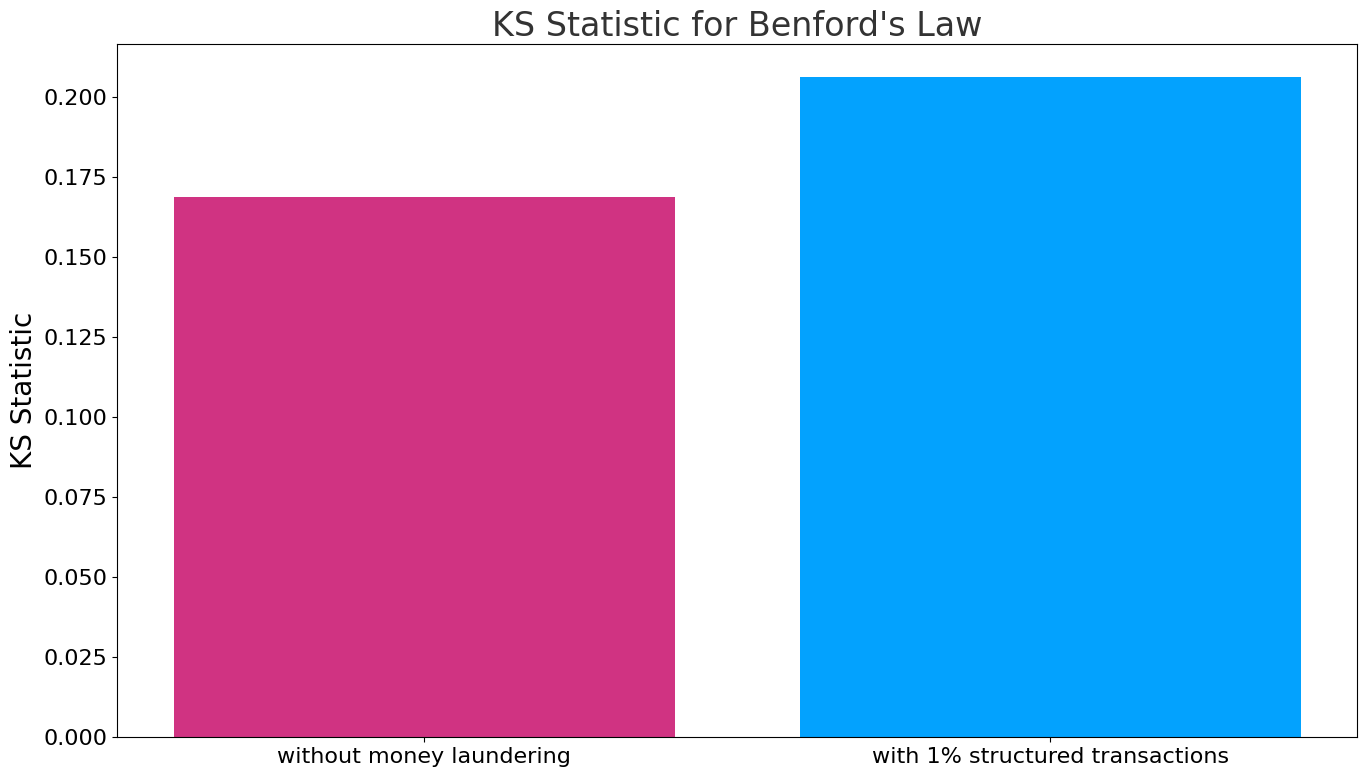

In [ ]:
# Custom KS test for Benford's Law
def ks_test_benford(observed_counts):
    # Get the cumulative distribution of the observed counts
    observed_cdf = np.cumsum(observed_counts)

    # Expected cumulative distribution for Benford's Law
    expected_cdf = np.cumsum(list(benfords_law_digit_distribution().values()))

    # Calculate the KS statistic as the maximum absolute difference between the two
    ks_statistic = np.max(np.abs(observed_cdf - expected_cdf))

    return ks_statistic

# Calculate the first digit counts as proportions
natural_first_digit_counts = calculate_first_digit_distribution(aggregated_natural_transactions)
structured_first_digit_counts = calculate_first_digit_distribution(aggregated_structured_transactions)

# Apply the custom KS test
ks_stat_natural = ks_test_benford(natural_first_digit_counts)
ks_stat_structured = ks_test_benford(structured_first_digit_counts)

# Plot the KS statistics
plt.bar(['without money laundering', 'with 1% structured transactions'], [ks_stat_natural, ks_stat_structured], color=[primary_color, secondary_color])
title = 'KS Statistic for Benford\'s Law'
plt.title(title)
plt.ylabel('KS Statistic')
plt.savefig(title.lower().replace(' ', '-') + '.png')
plt.show()

### Kullback-Leibler (KL) Divergence

The Kullback-Leibler (KL) Divergence is a measure of how one probability distribution diverges from a second, reference probability distribution. Unlike the previous two tests, the KL Divergence is not a statistical test but a measure of information gain or loss when approximating one distribution with another. We use this to gauge the 'distance' between our transaction data's distribution and the expected distribution according to Benford's Law.

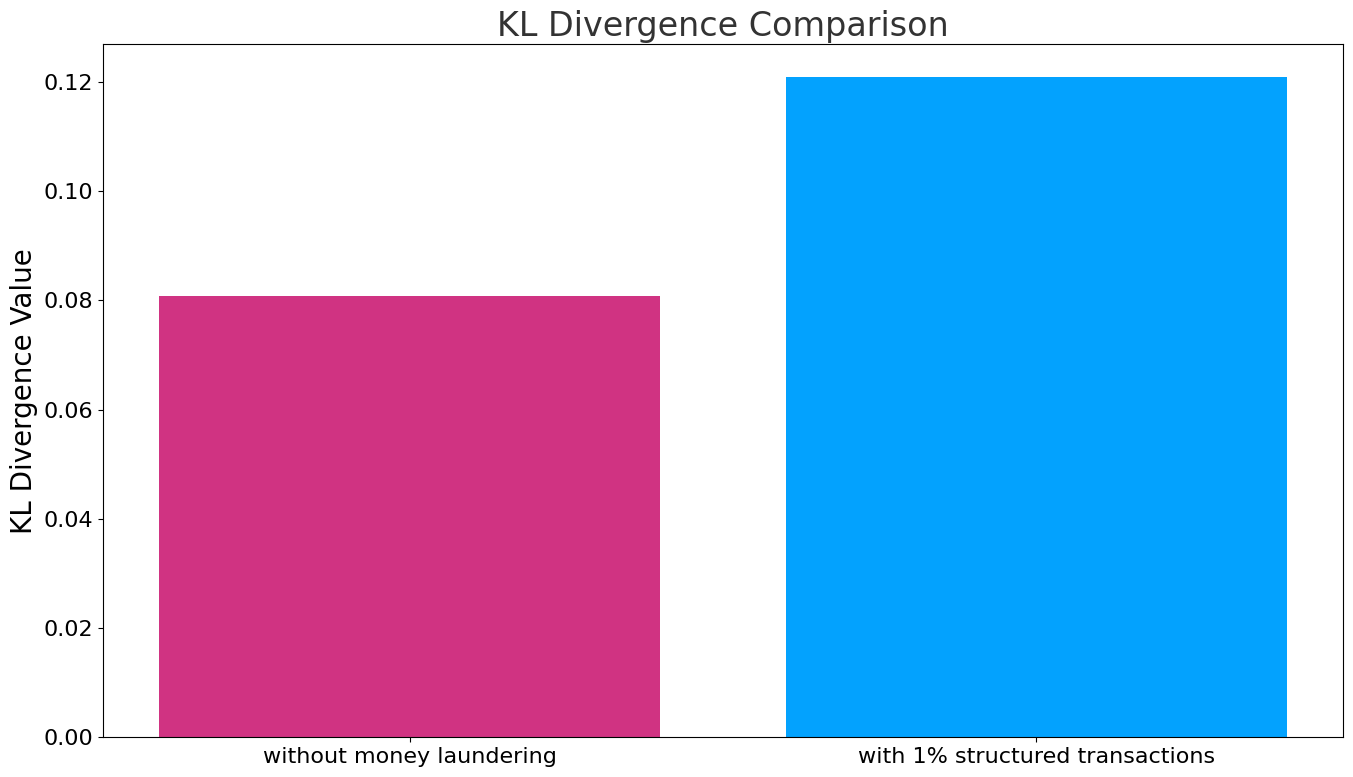

In [ ]:
from scipy.special import rel_entr

# Compute the KL Divergence
def calculate_kl_divergence(observed_distribution, expected_distribution):
    kl_divergence = sum(rel_entr(observed_distribution, expected_distribution))
    return kl_divergence

# Calculate KL Divergence
kl_div_natural = calculate_kl_divergence(natural_distribution, benfords_dist)
kl_div_structured = calculate_kl_divergence(structured_distribution, benfords_dist)

# Plot KL Divergence results
plt.bar(['without money laundering', 'with 1% structured transactions'], [kl_div_natural, kl_div_structured], color=[primary_color, secondary_color])
title = 'KL Divergence Comparison'
plt.title(title)
plt.ylabel('KL Divergence Value')
plt.savefig(title.lower().replace(' ', '-') + '.png')
plt.show()